<a href="https://colab.research.google.com/github/ShubhamW248/AutoEncoders/blob/main/Image_Compression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression and Dimensionality Reduction using Autoencoders
In this notebook, we'll implement an autoencoder for compressing and reducing the dimensionality of images. We'll use the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 different classes.


In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Load CIFAR-10 dataset
(X_train, _), (X_test, _) = cifar10.load_data()

# Normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# We will focus only on the first 10,000 images for quicker training
X_train = X_train[:10000]
X_test = X_test[:2000]

# Input shape for CIFAR-10 images
input_shape = X_train.shape[1:]

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (10000, 32, 32, 3)
Test data shape: (2000, 32, 32, 3)


### Autoencoder Architecture

We'll use a convolutional autoencoder with an encoder to compress the image into a lower-dimensional latent space, and a decoder to reconstruct the image back to its original size.


In [2]:
# Building the autoencoder model
input_img = Input(shape=input_shape)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Latent Space (compressed representation)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Output layer (reconstruction)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Model compilation
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,523 (115.32 KB)

 Trainable params: 29,523 (115.32 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Autoencoder
We will now train the autoencoder using the CIFAR-10 dataset. We'll use a batch size of 128 and train for 50 epochs.


In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with early stopping
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          callbacks=[early_stopping])


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 364ms/step - loss: 0.5705 - val_loss: 0.5699
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - loss: 0.5670 - val_loss: 0.5678
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 376ms/step - loss: 0.5650 - val_loss: 0.5669
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - loss: 0.5638 - val_loss: 0.5662
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 362ms/step - loss: 0.5636 - val_loss: 0.5650
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 363ms/step - loss: 0.5633 - val_loss: 0.5644
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - loss: 0.5629 - val_loss: 0.5639
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 363ms/step - loss: 0.5626 - val_loss: 0.5638
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 376ms/step - loss: 0.5610 - val_loss: 0.5652
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 377ms/step - loss: 0.5616 - val_loss: 0.5629
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 376ms/step - loss: 0.5618 - val_loss: 0.5626
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40

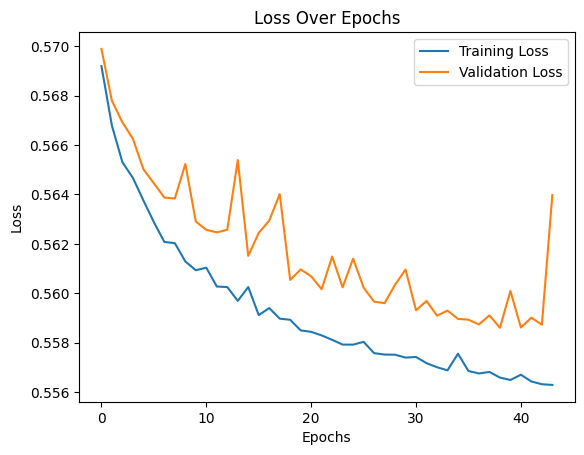

In [5]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Testing the Autoencoder
We'll now use the trained autoencoder to compress and reconstruct the test images, and compare the original images with the reconstructed ones.


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step


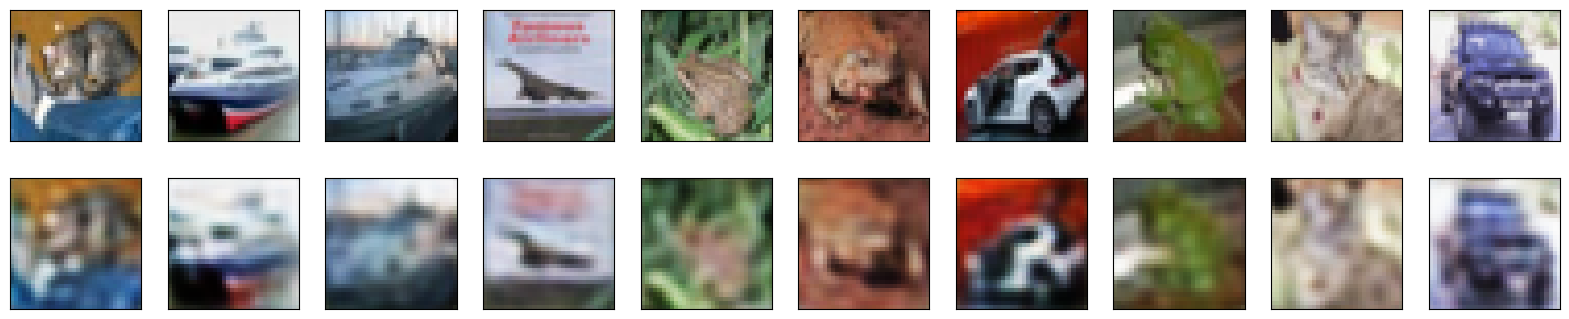

In [6]:
# Generate compressed and reconstructed images
decoded_imgs = autoencoder.predict(X_test)

# Visualize original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
